<a href="https://colab.research.google.com/github/chrispinciza01/Network_ID_Model_CCN-RNN/blob/main/rnn_ccn_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Python Libraries**

In [1]:
from keras.callbacks import CSVLogger, ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd  # For data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reading Dataset

In [3]:
network_data = pd.read_csv("/content/drive/MyDrive/KEMU/Masters/Trimester 4/Thesis_project/dataset/CSE-CIC-IDS2018/CSE-CIC-IDS2018bclean_data.csv")

In [4]:
network_data

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476965,80,6,23/02/2018 03:17:24,46,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection
2476966,80,6,23/02/2018 10:47:35,277,2,1,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection
2476967,80,6,23/02/2018 10:22:41,331,2,1,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection
2476968,80,6,23/02/2018 03:06:20,313,2,1,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection


# EDA Exploratory Data Analysis
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data. EDA helps to find meaningful patterns in data. EDA provides in-depth insights into the data sets to solve our business problems. EDA gives a clue to impute missing values in the dataset

## Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [4]:
# Descriptive Statistics:
network_data.describe(include='all')

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.476970e+06,2.476970e+06,2476970,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,...,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,2.476970e+06,2476970
unique,NaN,NaN,64400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,NaN,NaN,01/03/2018 10:22:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1028459
mean,1.169900e+04,7.022704e+00,NaN,3.228846e+06,8.643603e+01,4.015430e+00,3.015213e+03,2.107048e+03,2.523971e+02,4.153220e+00,...,2.129115e+01,3.578978e+04,1.433801e+04,5.648974e+04,2.717503e+04,1.456414e+06,3.257767e+05,2.200500e+06,1.028539e+06,NaN
std,2.153226e+04,3.279778e+00,NaN,8.200328e+08,3.189059e+03,6.973861e+01,1.029486e+05,1.003950e+05,3.544812e+02,1.593818e+01,...,7.566178e+00,7.029148e+05,3.775848e+05,9.214832e+05,6.204746e+05,3.523177e+08,2.485463e+08,9.903531e+08,1.210250e+07,NaN
min,0.000000e+00,0.000000e+00,NaN,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.300000e+01,6.000000e+00,NaN,5.330000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,8.000000e+01,6.000000e+00,NaN,3.050000e+03,2.000000e+00,1.000000e+00,3.600000e+01,5.300000e+01,3.400000e+01,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,8.080000e+03,6.000000e+00,NaN,1.844600e+04,5.000000e+00,4.000000e+00,5.600000e+02,3.150000e+02,3.420000e+02,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


## separate Numerical and categorical variables for easy analysis

In [5]:
numerical_variables = network_data.select_dtypes(include=["int64", "float64"])
categorical_variables = network_data.select_dtypes(include=["object"])

In [6]:
print("Categorical Variables:")
print(categorical_variables.to_numpy())
print("Numerical Variables:")
print(numerical_variables.to_numpy())

Categorical Variables:
[['14/02/2018 08:31:01' 'Benign']
 ['14/02/2018 08:33:50' 'Benign']
 ['14/02/2018 08:36:39' 'Benign']
 ...
 ['23/02/2018 10:22:41' 'SQL Injection']
 ['23/02/2018 03:06:20' 'SQL Injection']
 ['23/02/2018 10:53:21' 'SQL Injection']]
Numerical Variables:
[[0.00000000e+00 0.00000000e+00 1.12641719e+08 ... 1.39300036e+02
  5.63209580e+07 5.63207610e+07]
 [0.00000000e+00 0.00000000e+00 1.12641466e+08 ... 1.14551299e+02
  5.63208140e+07 5.63206520e+07]
 [0.00000000e+00 0.00000000e+00 1.12638623e+08 ... 3.01934596e+02
  5.63195250e+07 5.63190980e+07]
 ...
 [8.00000000e+01 6.00000000e+00 3.31000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.00000000e+01 6.00000000e+00 3.13000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.00000000e+01 6.00000000e+00 1.90000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [7]:
network_data['Label'].value_counts()

Label
Benign                  1028459
DDOS attack-HOIC         686012
Bot                      286191
FTP-BruteForce           193360
SSH-Bruteforce           187589
Infilteration             93063
DDOS attack-LOIC-UDP       1730
Brute Force -Web            362
Brute Force -XSS            151
SQL Injection                53
Name: count, dtype: int64

## visualizing the dataset by taking one variable at a time

Dst Port
Skew : 1.58


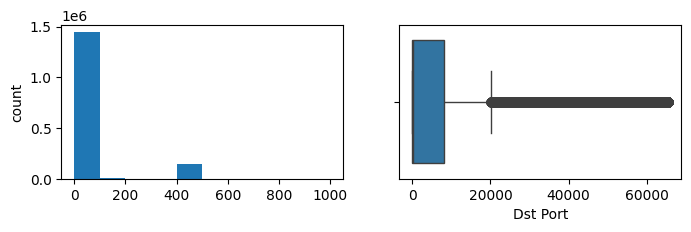

Protocol
Skew : 2.62


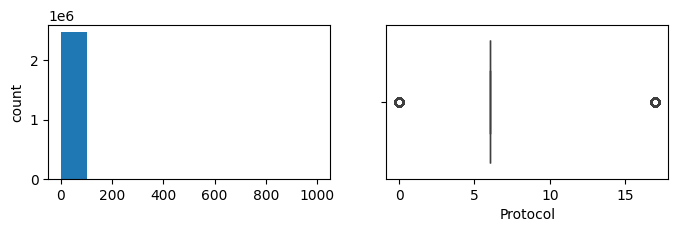

Flow Duration
Skew : -923.81


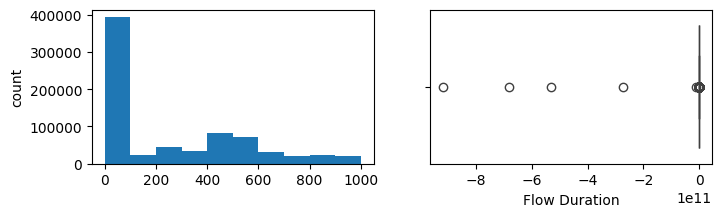

Tot Fwd Pkts
Skew : 40.84


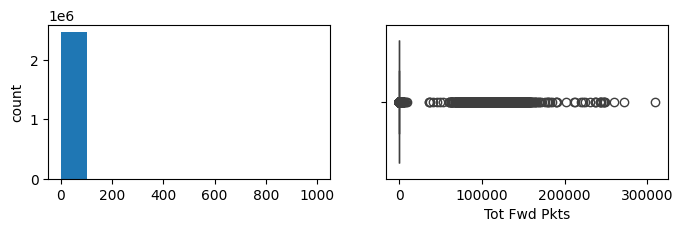

Tot Bwd Pkts
Skew : 99.26


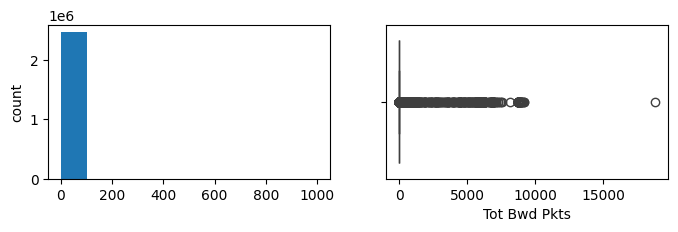

TotLen Fwd Pkts
Skew : 41.14


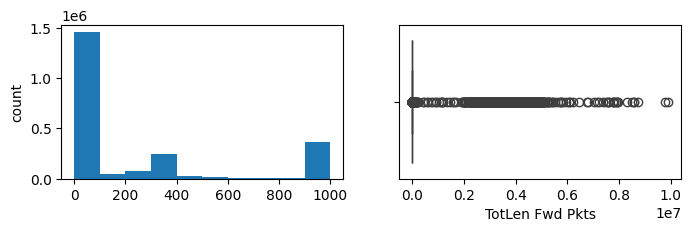

TotLen Bwd Pkts
Skew : 101.89


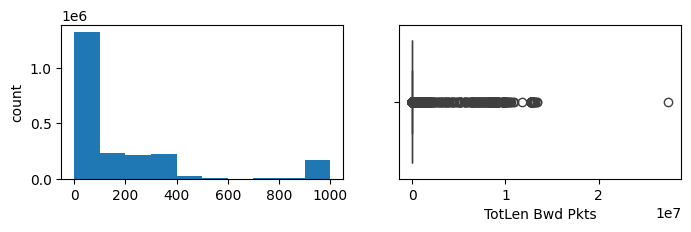

Fwd Pkt Len Max
Skew : 5.21


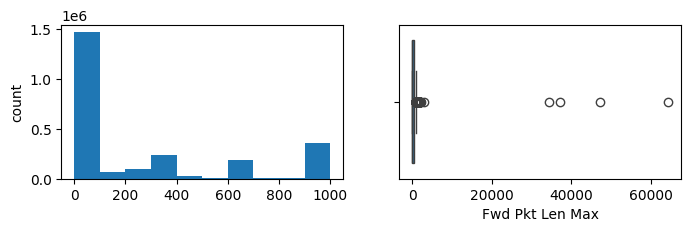

Fwd Pkt Len Min
Skew : 13.27


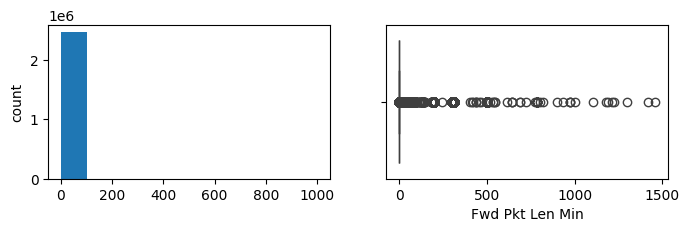

Fwd Pkt Len Mean
Skew : 4.56


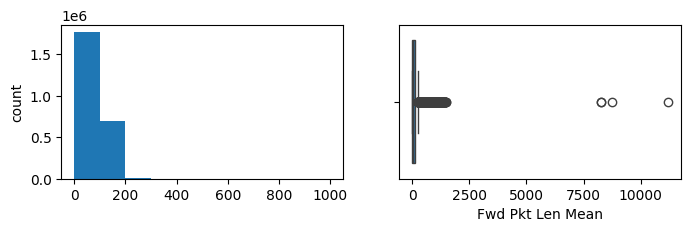

Fwd Pkt Len Std
Skew : 1.8


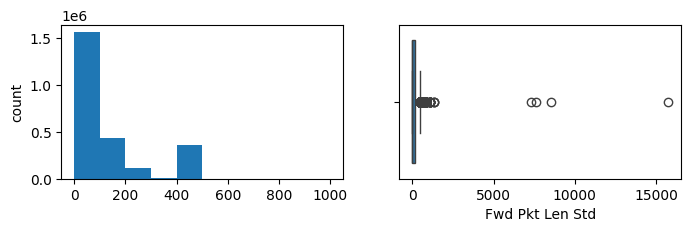

Bwd Pkt Len Max
Skew : 1.58


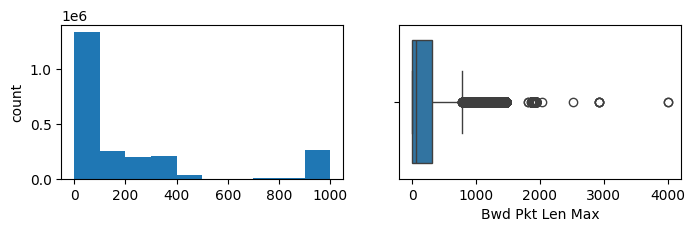

Bwd Pkt Len Min
Skew : 4.06


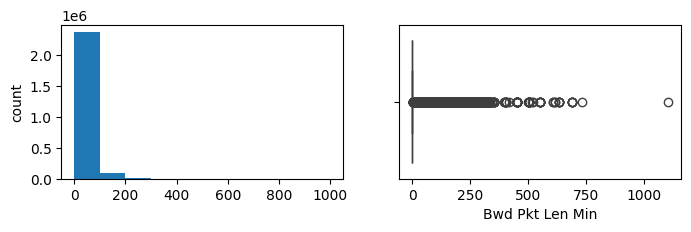

Bwd Pkt Len Mean
Skew : 3.79


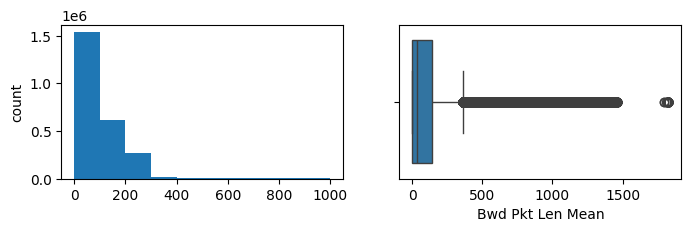

Bwd Pkt Len Std
Skew : 1.4


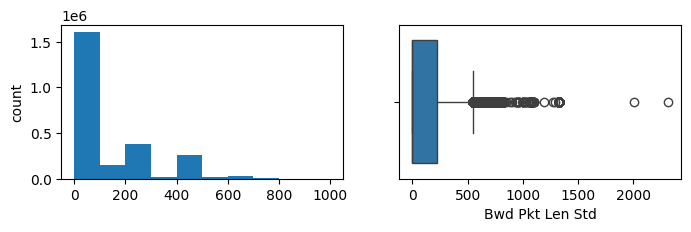

Flow Byts/s
Skew : nan


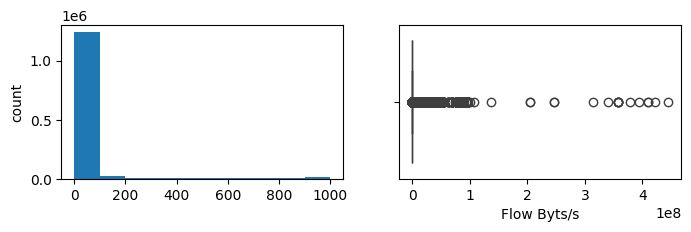

Flow Pkts/s
Skew : nan


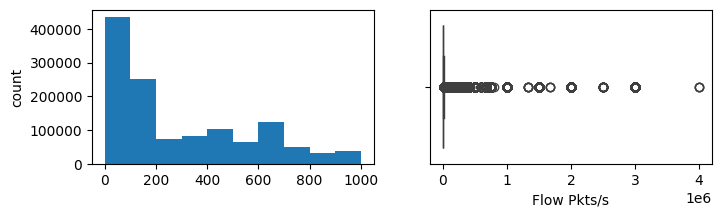

Flow IAT Mean
Skew : -1566.35


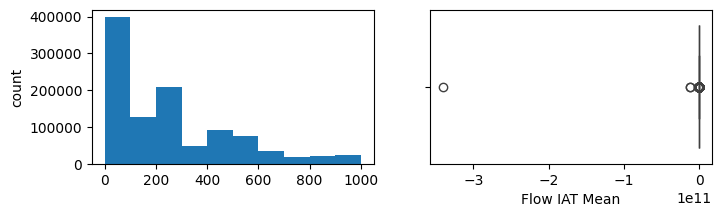

Flow IAT Std
Skew : 819.17


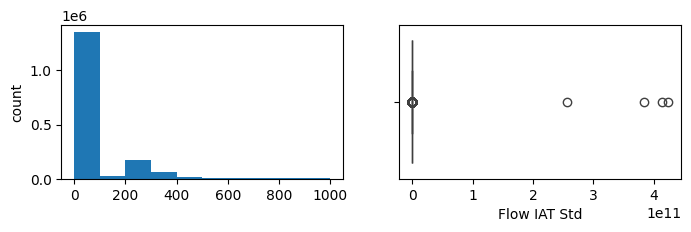

Flow IAT Max
Skew : 908.18


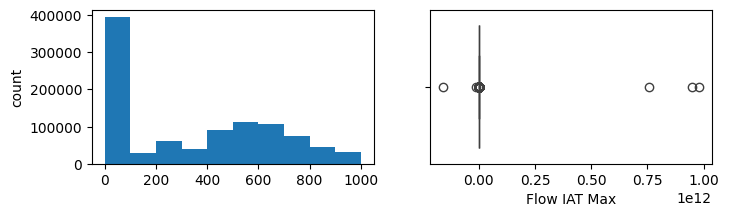

Flow IAT Min
Skew : -828.58


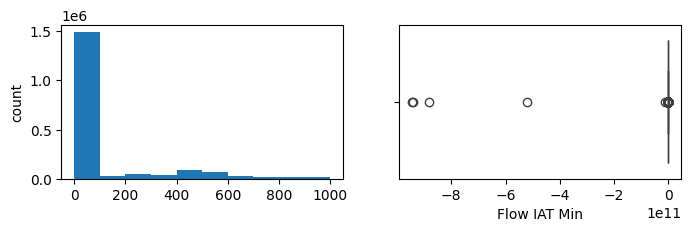

Fwd IAT Tot
Skew : -923.83


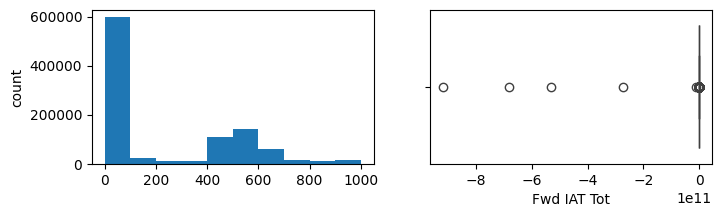

Fwd IAT Mean
Skew : -1566.29


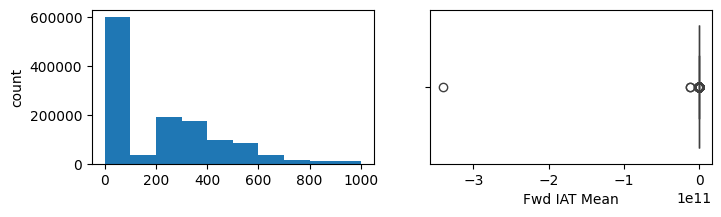

Fwd IAT Std
Skew : 819.17


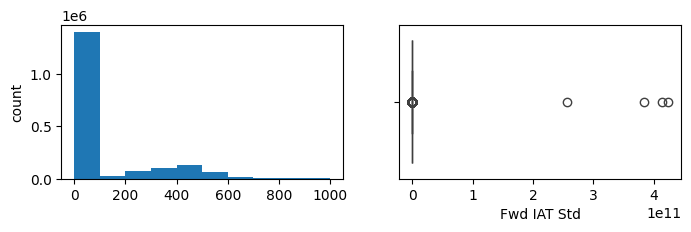

Fwd IAT Max
Skew : 908.18


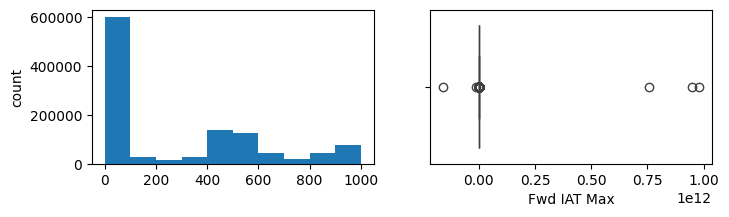

Fwd IAT Min
Skew : -828.57


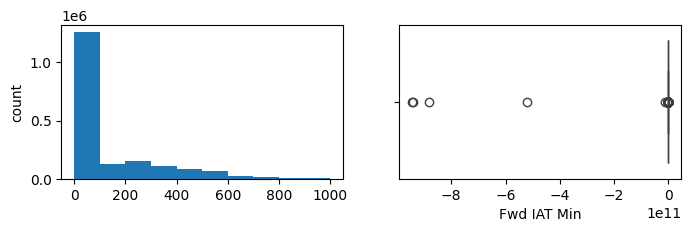

Bwd IAT Tot
Skew : 6.42


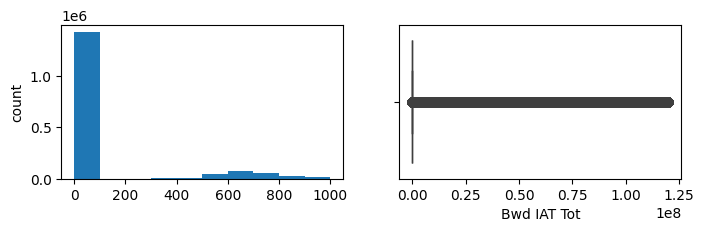

Bwd IAT Mean
Skew : 21.93


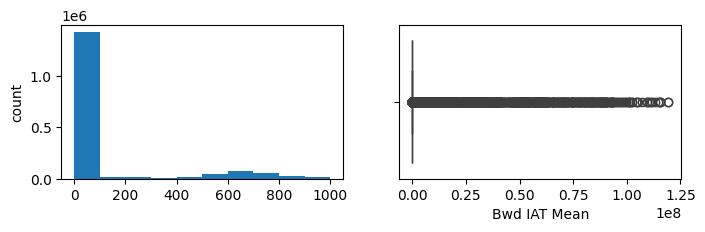

Bwd IAT Std
Skew : 10.51


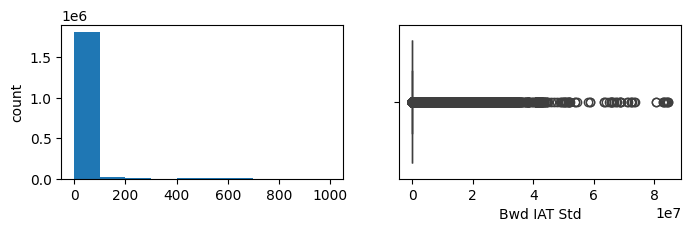

Bwd IAT Max
Skew : 9.43


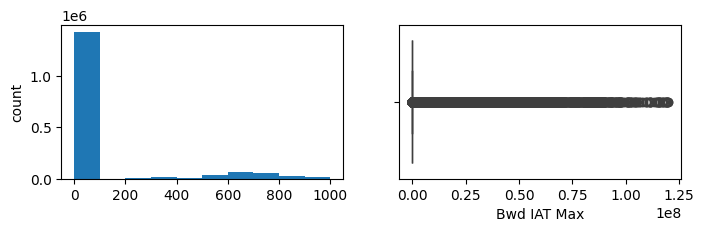

Bwd IAT Min
Skew : 46.94


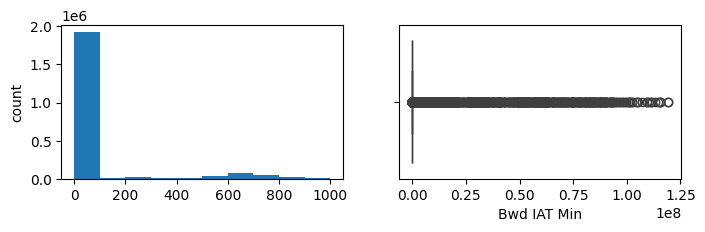

Fwd PSH Flags
Skew : 8.39


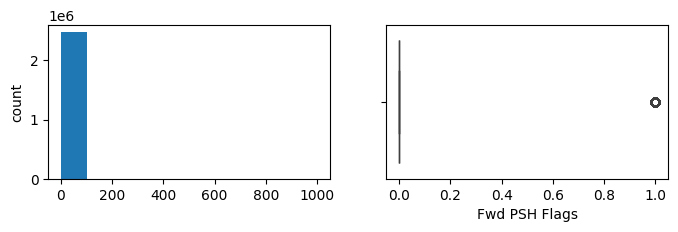

Bwd PSH Flags
Skew : 0


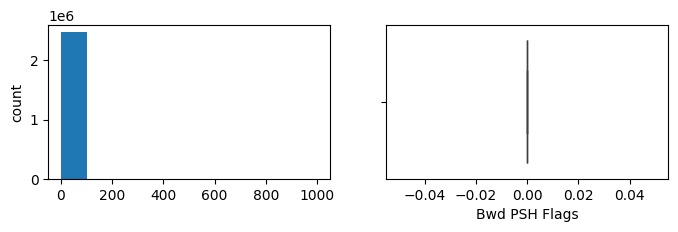

Fwd URG Flags
Skew : 54.5


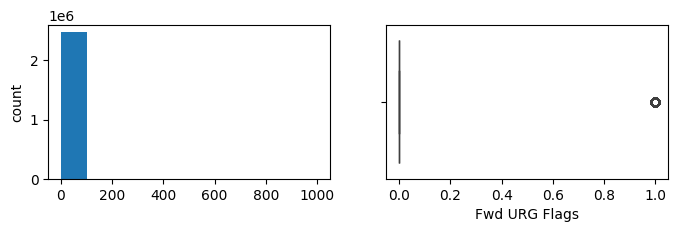

Bwd URG Flags
Skew : 0


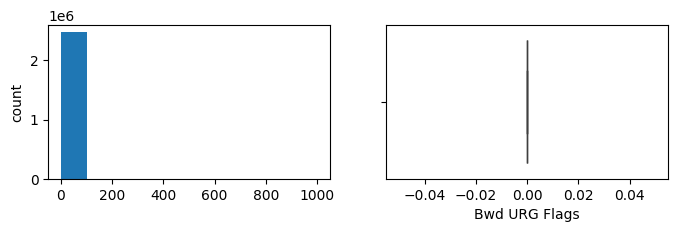

Fwd Header Len
Skew : 40.8


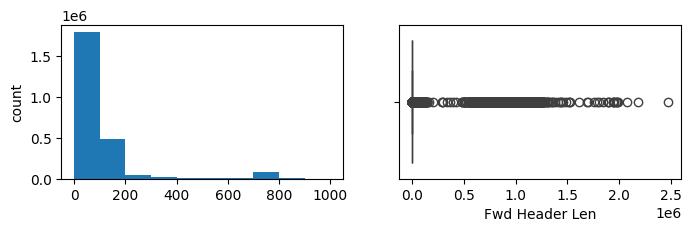

Bwd Header Len
Skew : 98.64


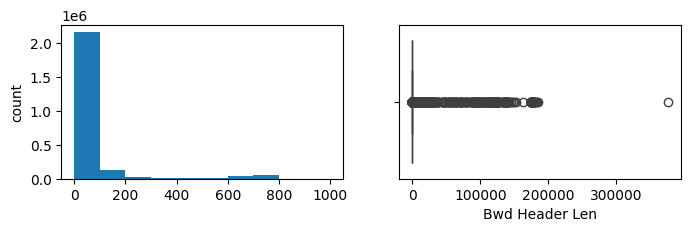

Fwd Pkts/s
Skew : 5.1


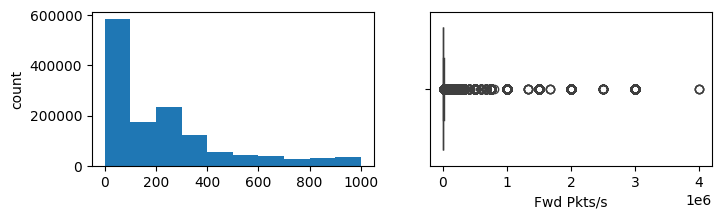

Bwd Pkts/s
Skew : 4.04


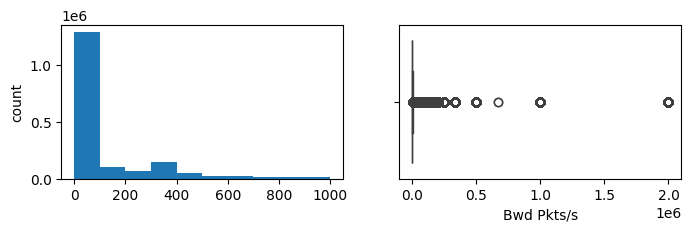

Pkt Len Min
Skew : 11.43


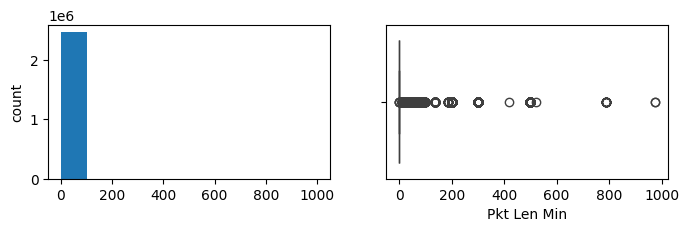

Pkt Len Max
Skew : 2.53


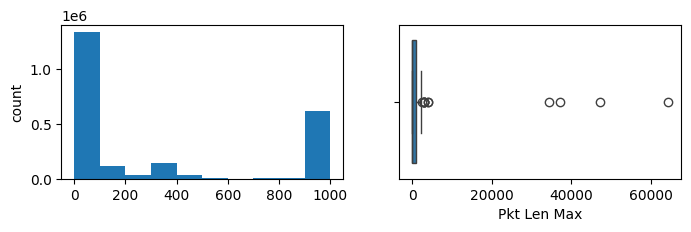

Pkt Len Mean
Skew : 3.05


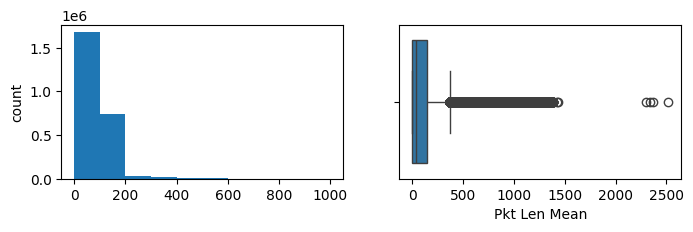

Pkt Len Std
Skew : 1.05


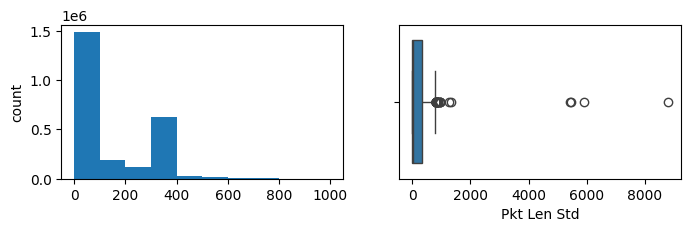

Pkt Len Var
Skew : 342.37


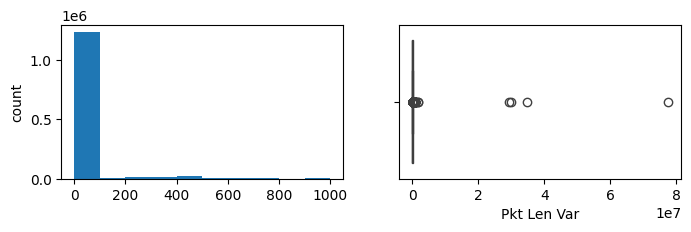

FIN Flag Cnt
Skew : 24.22


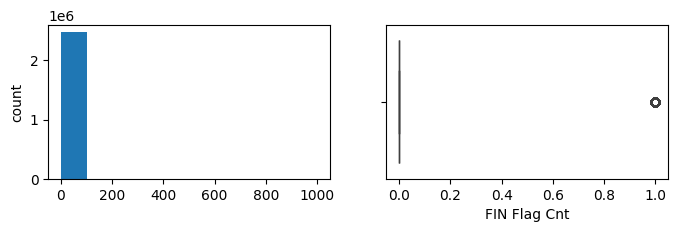

SYN Flag Cnt
Skew : 8.39


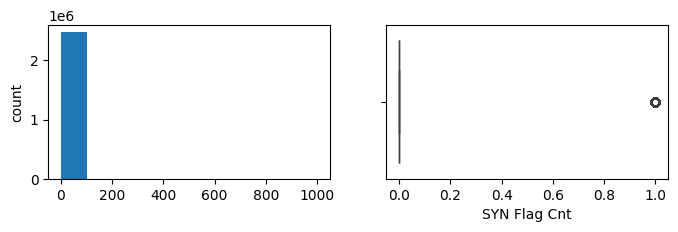

RST Flag Cnt
Skew : 0.91


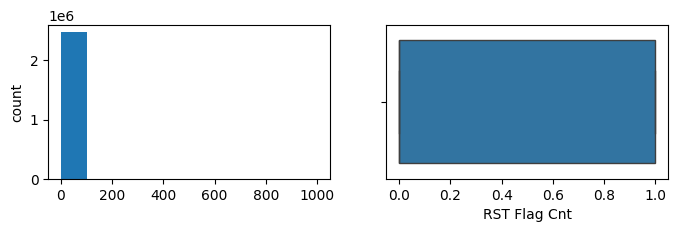

PSH Flag Cnt
Skew : -0.04


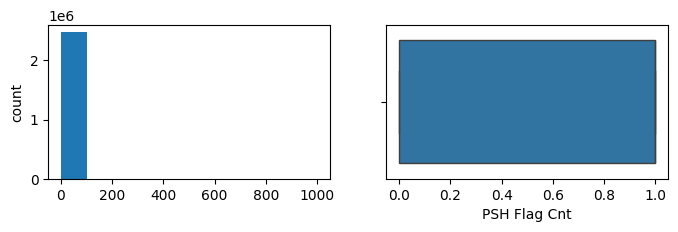

ACK Flag Cnt
Skew : 0.47


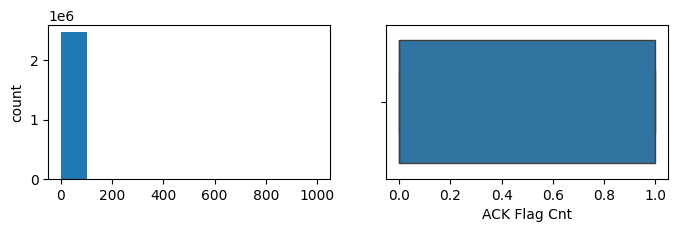

URG Flag Cnt
Skew : 3.99


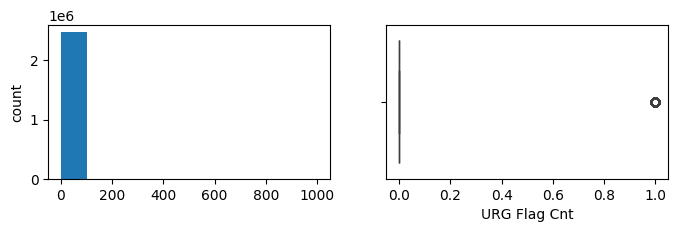

CWE Flag Count
Skew : 54.5


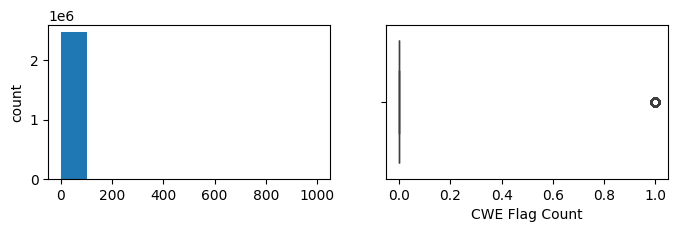

ECE Flag Cnt
Skew : 0.91


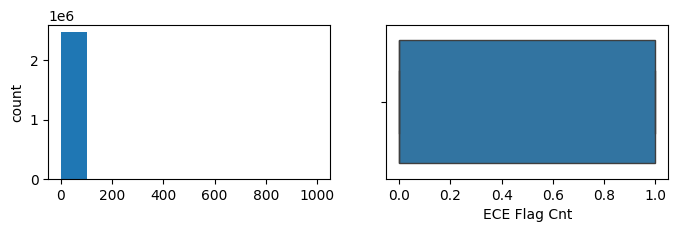

Down/Up Ratio
Skew : 15.36


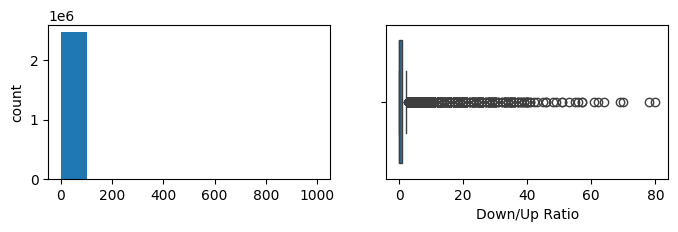

Pkt Size Avg
Skew : 2.5


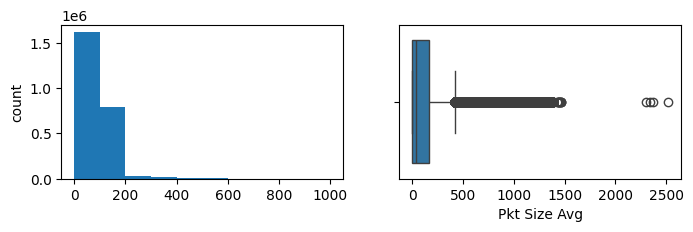

Fwd Seg Size Avg
Skew : 4.56


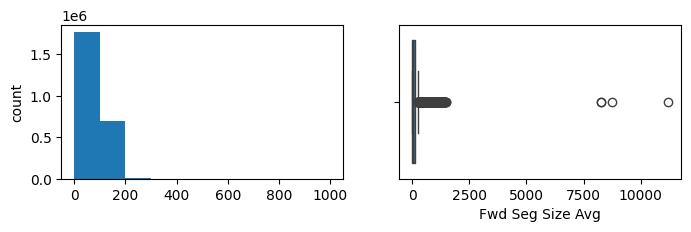

Bwd Seg Size Avg
Skew : 3.79


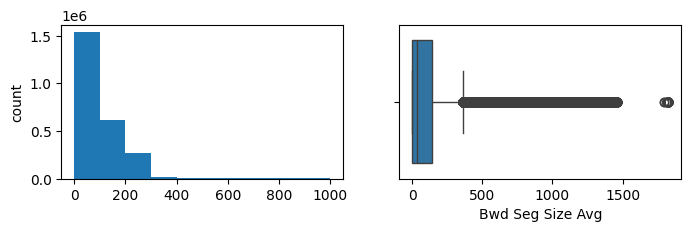

Fwd Byts/b Avg
Skew : 0


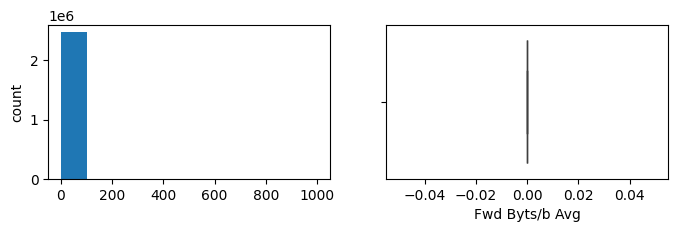

Fwd Pkts/b Avg
Skew : 0


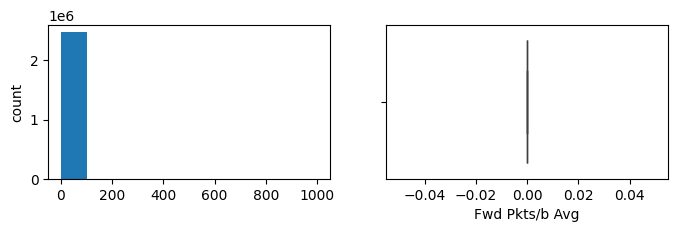

Fwd Blk Rate Avg
Skew : 0


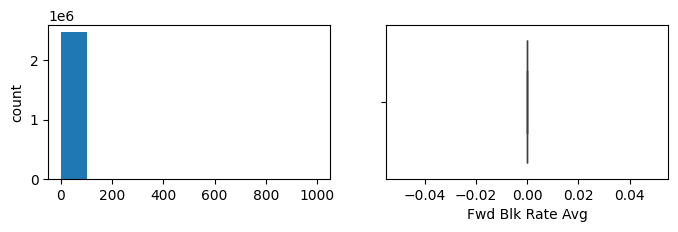

Bwd Byts/b Avg
Skew : 0


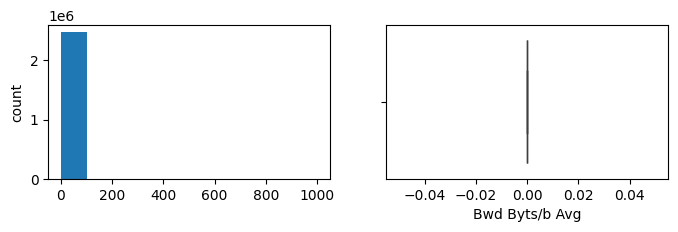

Bwd Pkts/b Avg
Skew : 0


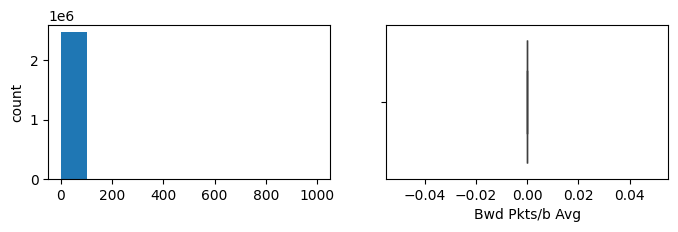

Bwd Blk Rate Avg
Skew : 0


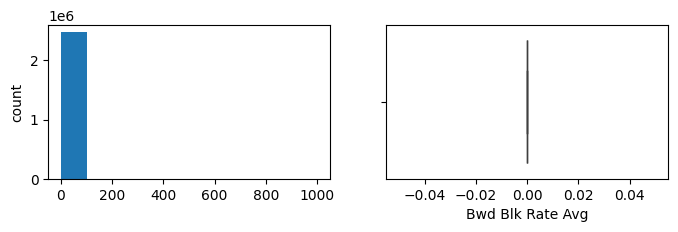

Subflow Fwd Pkts
Skew : 40.84


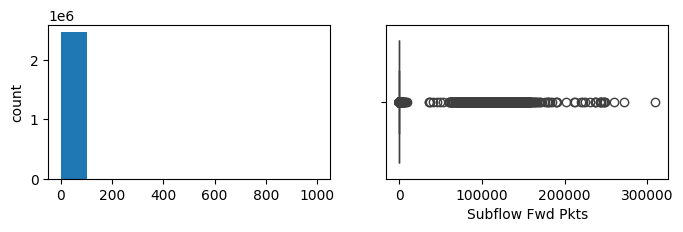

Subflow Fwd Byts
Skew : 41.14


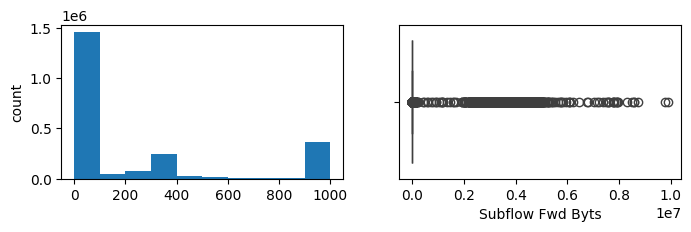

Subflow Bwd Pkts
Skew : 99.26


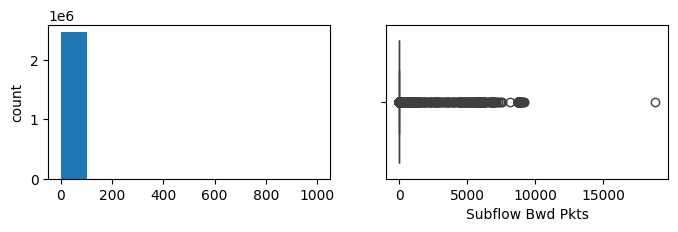

Subflow Bwd Byts
Skew : 101.87


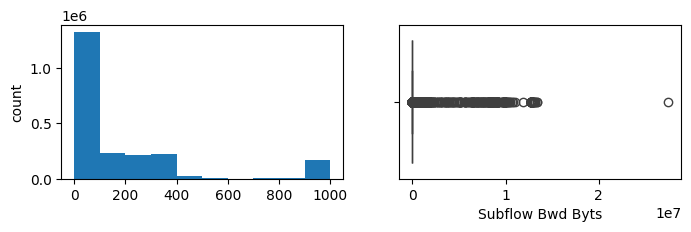

Init Fwd Win Byts
Skew : 0.56


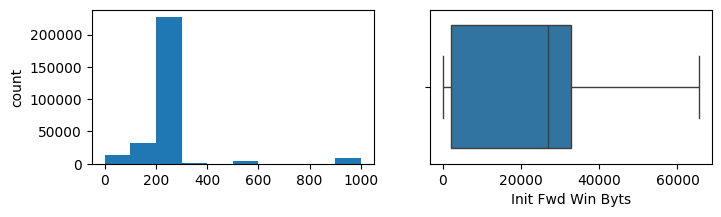

Init Bwd Win Byts
Skew : 2.08


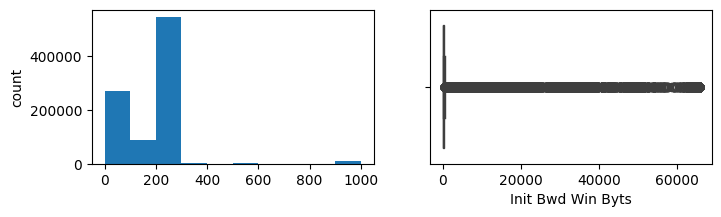

Fwd Act Data Pkts
Skew : 40.85


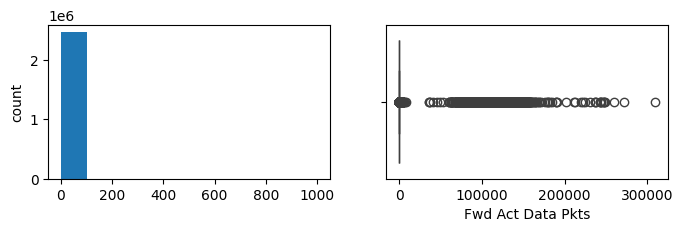

Fwd Seg Size Min
Skew : 0.77


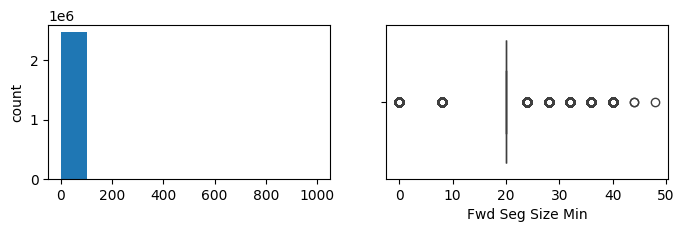

Active Mean
Skew : 71.46


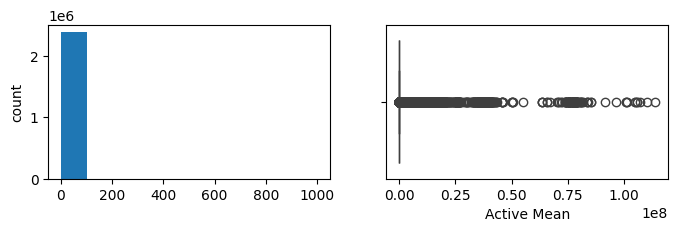

Active Std
Skew : 91.31


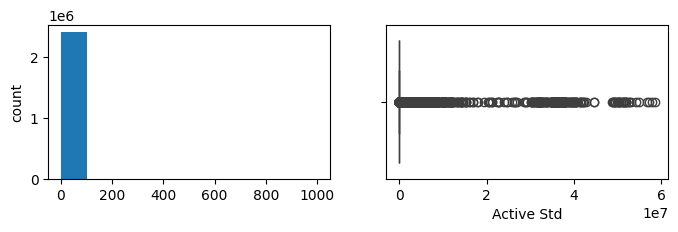

Active Max
Skew : 57.4


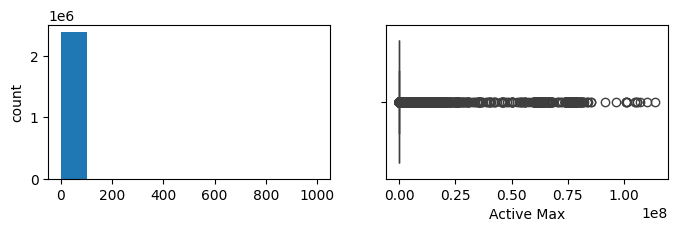

Active Min
Skew : 89.05


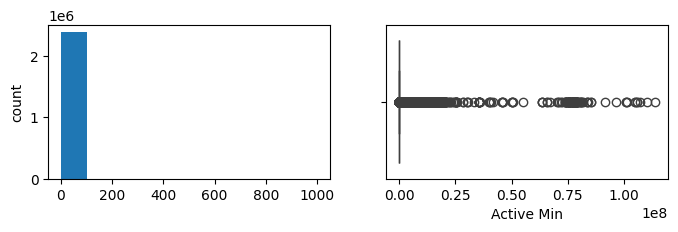

Idle Mean
Skew : 915.99


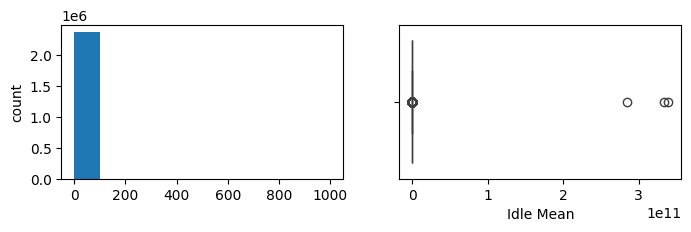

Idle Std
Skew : 921.38


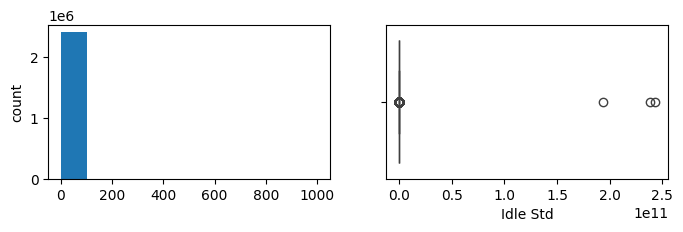

Idle Max
Skew : 924.28


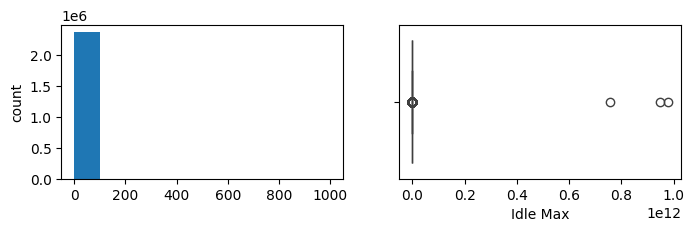

Idle Min
Skew : 590.6


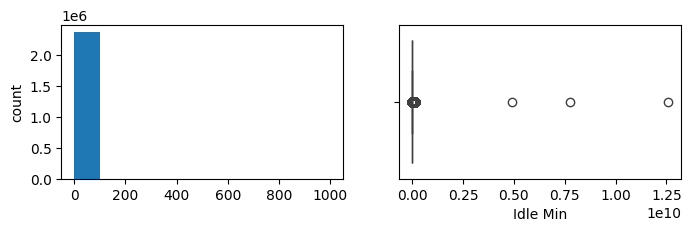

In [9]:
# histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

for col in numerical_variables:
    print(col)
    print('Skew :', round(network_data[col].skew(), 2))
    plt.figure(figsize = (8, 2))
    plt.subplot(1, 2, 1)
    #network_data[col].hist(grid=False)
    network_data[col].hist(grid=False, range=[0, 1000])  # Replace 1000 with the maximum value in the column | Set the range parameter to a finite range:
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=network_data[col])
    plt.show()

## Categorical variables are being visualized using a count plot.

In [8]:
# Print the categorical features
print("Categorical Features:")
for col in categorical_variables.columns:
    print(col)

Categorical Features:
Timestamp
Label


In [9]:
# prompt: display all the numerical feature

print("Numerical Features:")
for col in numerical_variables.columns:
    print(col)

Numerical Features:
Dst Port
Protocol
Flow Duration
Tot Fwd Pkts
Tot Bwd Pkts
TotLen Fwd Pkts
TotLen Bwd Pkts
Fwd Pkt Len Max
Fwd Pkt Len Min
Fwd Pkt Len Mean
Fwd Pkt Len Std
Bwd Pkt Len Max
Bwd Pkt Len Min
Bwd Pkt Len Mean
Bwd Pkt Len Std
Flow Byts/s
Flow Pkts/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Tot
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Tot
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
Fwd Header Len
Bwd Header Len
Fwd Pkts/s
Bwd Pkts/s
Pkt Len Min
Pkt Len Max
Pkt Len Mean
Pkt Len Std
Pkt Len Var
FIN Flag Cnt
SYN Flag Cnt
RST Flag Cnt
PSH Flag Cnt
ACK Flag Cnt
URG Flag Cnt
CWE Flag Count
ECE Flag Cnt
Down/Up Ratio
Pkt Size Avg
Fwd Seg Size Avg
Bwd Seg Size Avg
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Bwd Pkts/b Avg
Bwd Blk Rate Avg
Subflow Fwd Pkts
Subflow Fwd Byts
Subflow Bwd Pkts
Subflow Bwd Byts
Init Fwd Win Byts
Init Bwd Win Byts
Fwd Act Data Pkts
Fwd Seg S

# Feature selection

**Deteted columns**:

'Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg','Bwd Blk Rate Avg'.

‘Flow ID’, ‘Source IP’, ‘Destination IP’, ‘Timestamp’, and ‘Inbound’
These features do not contribute any discriminatory information that could help differentiate between the attack classes.



In [10]:
print(network_data.columns)

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [11]:
# prompt: in network_data delete columns where all values are zero and timestamp

network_data = network_data.drop(columns=['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg','Bwd Blk Rate Avg', 'Timestamp'])


## The remaining features

In [12]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476970 entries, 0 to 2476969
Data columns (total 71 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Flow Duration      int64  
 3   Tot Fwd Pkts       int64  
 4   Tot Bwd Pkts       int64  
 5   TotLen Fwd Pkts    int64  
 6   TotLen Bwd Pkts    float64
 7   Fwd Pkt Len Max    int64  
 8   Fwd Pkt Len Min    int64  
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    int64  
 12  Bwd Pkt Len Min    int64  
 13  Bwd Pkt Len Mean   float64
 14  Bwd Pkt Len Std    float64
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float64
 17  Flow IAT Mean      float64
 18  Flow IAT Std       float64
 19  Flow IAT Max       float64
 20  Flow IAT Min       float64
 21  Fwd IAT Tot        float64
 22  Fwd IAT Mean       float64
 23  Fwd IAT Std        float64
 24  Fwd IAT Max        float64
 25  Fwd IAT Min       

# Feature encoding

In [13]:
network_data

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641719,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,112641466,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,112638623,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,6453966,15,10,1239,2273.0,744,0,82.600000,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,22,6,8804066,14,11,1143,2209.0,744,0,81.642857,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476965,80,6,46,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection
2476966,80,6,277,2,1,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection
2476967,80,6,331,2,1,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection
2476968,80,6,313,2,1,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection


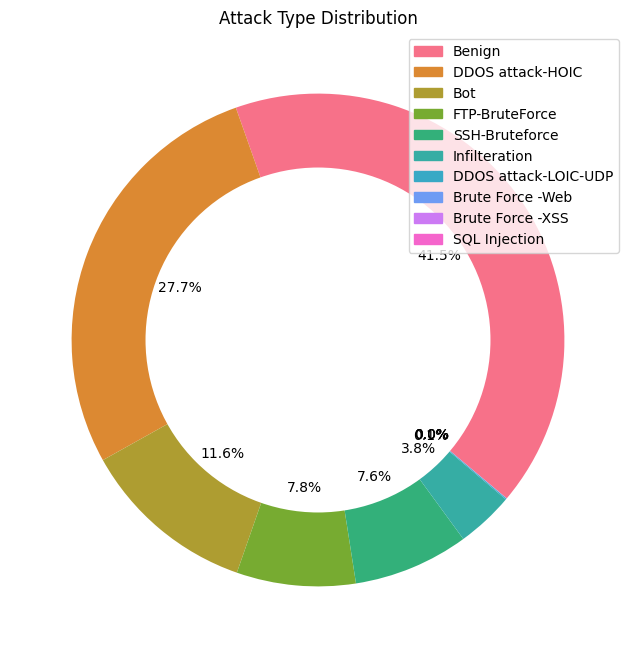

In [14]:
# prompt: Set up the figure and axes, Create a white circle at the center for a donut chart appearance,Set the title for the plot,reate a pie chart to visualize attack type distribution, Add the white circle to create a donut chart effect,Create legend with custom color patches, Show the plot

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create a white circle for the center of the donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

# Set the title for the plot
plt.title("Attack Type Distribution")

# Create a pie chart to visualize attack type distribution
labels = network_data['Label'].value_counts().index.to_list()
colors = sns.color_palette('husl', len(labels))
wedges, texts, autotexts = ax.pie(network_data['Label'].value_counts(), colors=colors, wedgeprops=dict(width=0.4), startangle=-40, autopct='%1.1f%%')

# Add the white circle to create a donut chart effect
ax.add_artist(centre_circle)

# Create legend with custom color patches
custom_patches = [plt.Circle((0, 0), 0.1, color=colors[i]) for i in range(len(labels))]
legend = ax.legend(custom_patches, labels, loc="upper right")

# Show the plot
plt.show()


In [15]:
# Tranform ‘Label’ column, using  ‘One-Hot Encoding’.

import pandas as pd
network_data = pd.get_dummies(network_data, columns=["Label"])


## Normalization